In [1]:
import numpy as np
import matplotlib.pyplot as plt, matplotlib.colors as colors
from matplotlib.gridspec import GridSpec
import seaborn as sns
import pandas as pd
import constants, os, math
import Plotting as pl

In [2]:
sns.__version__

'0.13.2'

In [2]:
folder = constants.folder
nameBase= folder.format('')
species=['CH3OH','#CH3OH']

df_sh = pl.buildDataframe(constants.SHOCK, constants.folder, constants.physical, species, singleDf=True)
df_hc = pl.buildDataframe(constants.HOTCORE, constants.folder, constants.physical, species, singleDf=True)
df_db = pl.buildDataframe([constants.SHOCK, constants.HOTCORE], constants.folder, constants.physical, species, singleDf=False)

In [36]:
la_df=pl.localAbundanceDataframe(df_db, constants.species, constants.physical, constants.BOTH, momento=constants.ALL, singleDf=False)

In [56]:
la_df['runName']

0           10.0_1000.0_1000.0_40.0.dat
1           10.0_1000.0_1000.0_40.0.dat
2           10.0_1000.0_1000.0_40.0.dat
3           10.0_1000.0_1000.0_40.0.dat
4           10.0_1000.0_1000.0_40.0.dat
                      ...              
13301    10.0_1000.0_1000000.0_50.0.dat
13302    10.0_1000.0_1000000.0_50.0.dat
13303    10.0_1000.0_1000000.0_50.0.dat
13304    10.0_1000.0_1000000.0_50.0.dat
13305    10.0_1000.0_1000000.0_50.0.dat
Name: runName, Length: 13306, dtype: object

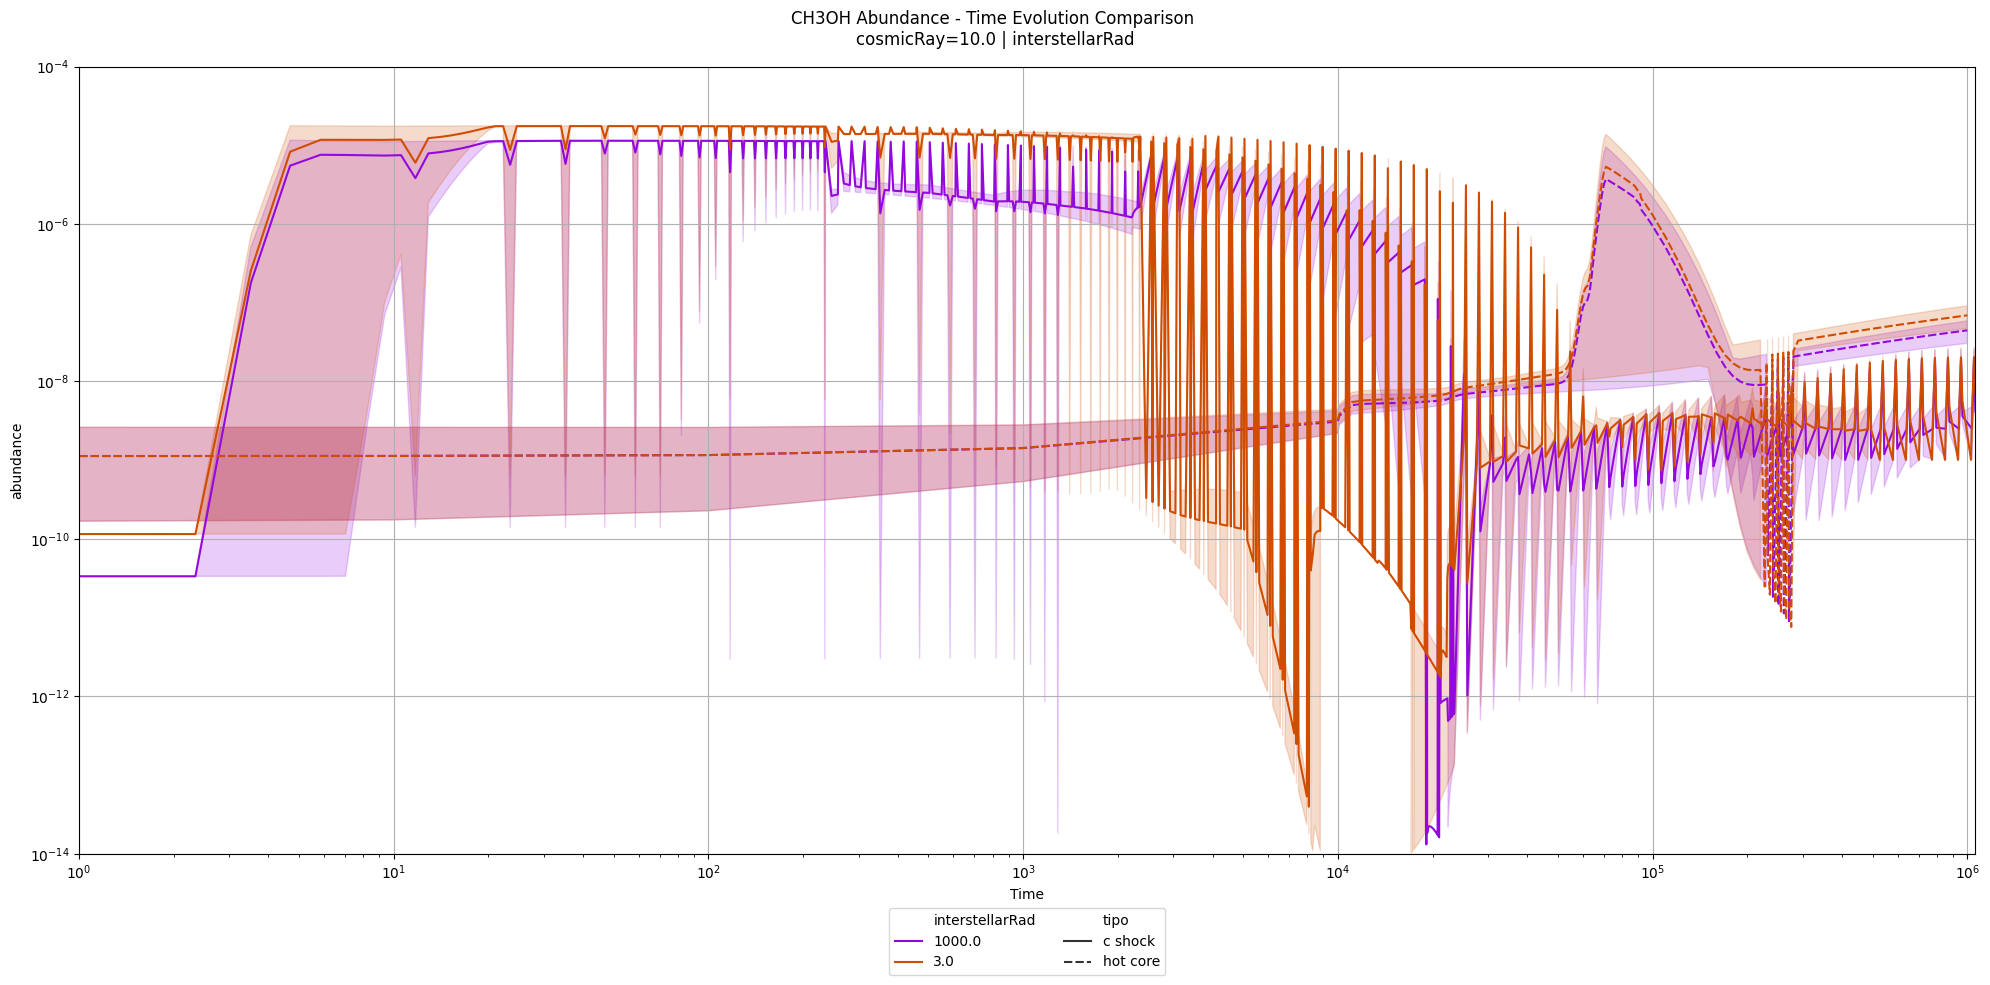

In [51]:
saveFig=True
returnFilepaths=True
pathDic=[]

focus=constants.COSMICRAY
param=la_df[focus].unique()[0]

df=la_df[la_df[focus]==param]

hue=constants.INTERSTELLARRAD

figName='_'.join([constants.ABUNDANCE,focus,param,hue])+'.png'

if returnFilepaths:pathDic.append({'focus':focus,'param':param,'hue':hue,'path':figName})

fig, ax = plt.subplots(figsize=(20,10), layout='tight')
ax.grid(True)  
sns.lineplot(data=df, x='Time', y='abundance',
             hue=hue, style='tipo',
             palette='gnuplot',
             errorbar=lambda x: (x.min(), x.max()),
             ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xbound(1,df['Time'].max())
ax.set_ybound(1e-14,1e-4)
sns.move_legend(ax, "upper center", bbox_to_anchor=(0.5, -0.06), ncol=df[hue].nunique())
fig.suptitle('CH3OH Abundance - Time Evolution Comparison \n'+' | '.join([f'{focus}={param}',hue]))
if saveFig: fig.savefig(figName, dpi=300, bbox_inches='tight')

Text(0.5, 0.98, 'CH3OH Abundance C SHOCK: iDens=10000.0')

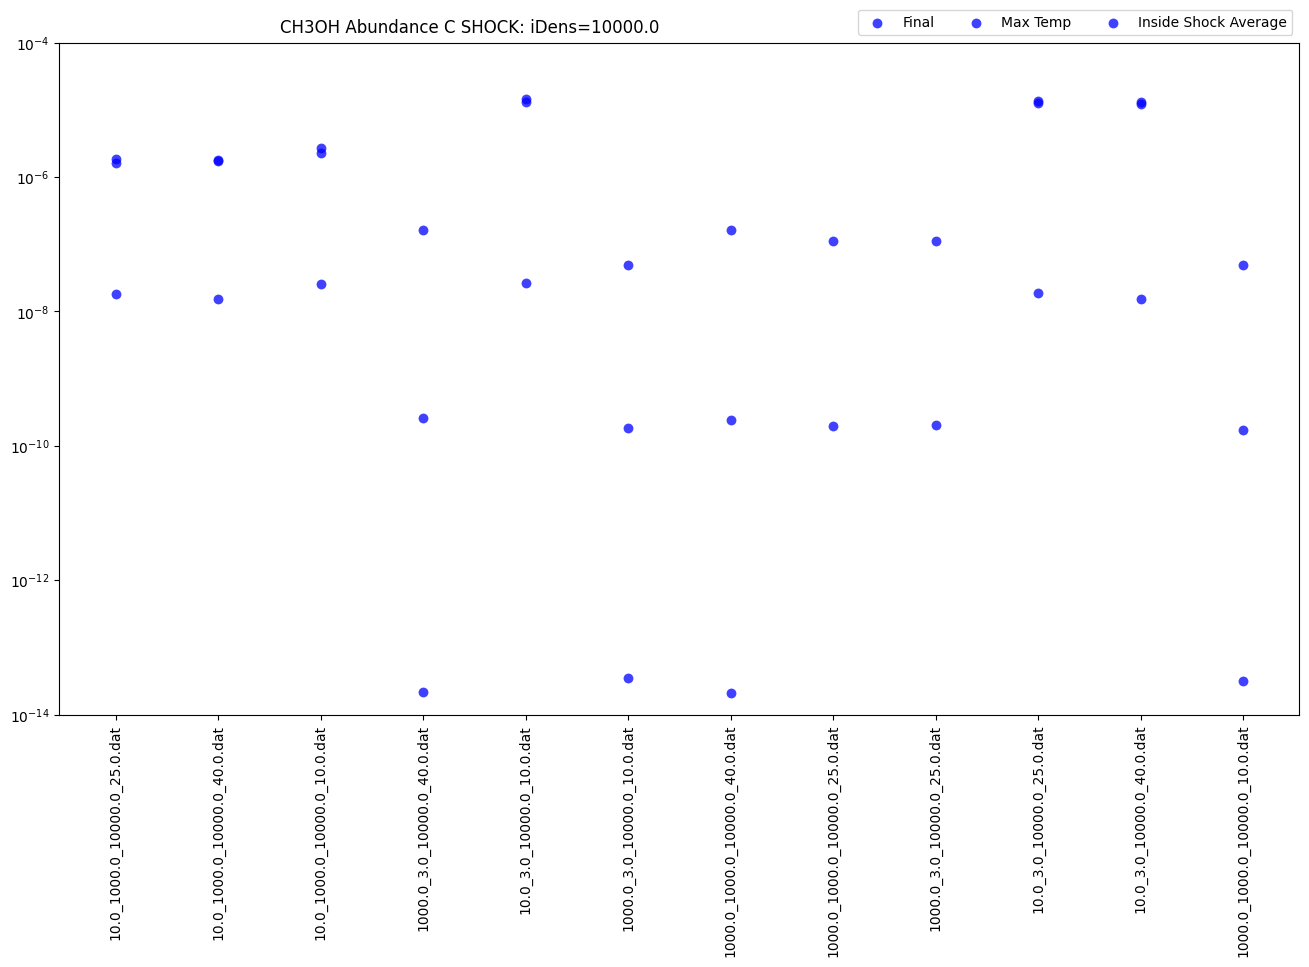

In [5]:
dfi=df_sh[df_sh['iDens']=='10000.0']
figName= '_'.join(['nameBase'+constants.SHOCK.replace(' ','').upper(),'abundance','iDens',str('10000.0')])+'.png'

fig, axs = plt.subplots(figsize=(16,8))
fig.subplots_adjust(top=0.95)
for i, time in enumerate(constants.times[constants.SHOCK]):
    df=pl.localAbundanceDataframe(dfi, constants.species, constants.physical, constants.SHOCK, momento=time, singleDf=True)
    axs.scatter(df['runName'], df['abundance'], label=time,
                c='b', s=50,
                linewidth=0, alpha=0.75)

axs.set_yscale('log')
axs.set_ybound(1e-14,1e-4)
axs.tick_params(axis='x', labelrotation=90)
fig.legend(ncols=3, loc="upper right", bbox_to_anchor=(0.9, 1))

fig.suptitle(f"CH3OH Abundance {constants.SHOCK.upper()}: {'iDens'}={'10000.0'}", ha='right')

In [ ]:
dfs={constants.HOTCORE: df_hc, constants.SHOCK: df_sh}
cols=['gasTemp', 'Density', 'av']
nCol=6
nRow=6

for i, tipo in enumerate([constants.SHOCK, constants.HOTCORE]):
    df=dfs[tipo]
    fig, axs = plt.subplots(nRow, nCol, figsize=(8*nCol,6*nRow*2))
    fig.subplots_adjust(top=0.98, wspace=0.15, hspace=0.3)
    fig.suptitle(tipo, size='xx-large', y=1)

    for i in range(nCol):
        for j in range(nRow):
            tdf=df[df['runName']==df['runName'][j+5*i]]
            ax=axs[i][j]

            for col in cols:
                ax.plot(tdf['Time_log'], tdf[col], label=None if i>0 and j>0 else col)
                ax.set_yscale('log')
            
            ax.set_title(df['runName'][j+5*i])
            ax.set_xlabel('Time_log')
            # ax.set_ybound(0,1e4)
    axs[0][0].legend()

In [7]:
species=['CH3OH','#CH3OH']
folder = constants.folder
nameBase= folder.format('Plots/')
tipo=constants.SHOCK

In [11]:
df_sh = pl.buildDataframe(constants.SHOCK, constants.folder, constants.physical, species, singleDf=True)
for runN in df_sh['runName'].unique():
    print('_'.join([nameBase+tipo.replace(' ','').upper(),constants.CONTINUITY,runN.strip('.dat')])+'.png')

/data2/gsampsonolalde/LEAPS-2024/CH3OH/Plots/CSHOCK_continuity_10.0_1000.0_1000.0_40.0.png
/data2/gsampsonolalde/LEAPS-2024/CH3OH/Plots/CSHOCK_continuity_10.0_1000.0_10000.0_25.0.png
/data2/gsampsonolalde/LEAPS-2024/CH3OH/Plots/CSHOCK_continuity_1000.0_3.0_1000.0_40.0.png
/data2/gsampsonolalde/LEAPS-2024/CH3OH/Plots/CSHOCK_continuity_1000.0_3.0_100000.0_25.0.png
/data2/gsampsonolalde/LEAPS-2024/CH3OH/Plots/CSHOCK_continuity_10.0_1000.0_1000.0_10.0.png
/data2/gsampsonolalde/LEAPS-2024/CH3OH/Plots/CSHOCK_continuity_10.0_3.0_1000.0_25.0.png
/data2/gsampsonolalde/LEAPS-2024/CH3OH/Plots/CSHOCK_continuity_1000.0_1000.0_1000.0_40.0.png
/data2/gsampsonolalde/LEAPS-2024/CH3OH/Plots/CSHOCK_continuity_10.0_1000.0_10000.0_40.0.png
/data2/gsampsonolalde/LEAPS-2024/CH3OH/Plots/CSHOCK_continuity_10.0_1000.0_10000.0_10.0.png
/data2/gsampsonolalde/LEAPS-2024/CH3OH/Plots/CSHOCK_continuity_1000.0_3.0_10000.0_40.0.png
/data2/gsampsonolalde/LEAPS-2024/CH3OH/Plots/CSHOCK_continuity_10.0_1000.0_100000.0_25.0

In [10]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

backend = mpl.get_backend()
mpl.use('agg')

tipo=constants.SHOCK
df=df_sh

cols=['gasTemp', 'Density', 'av']
species=['CH3OH','#CH3OH']
colors=['#ca1551','#054a29','#4cb944','#e6b40f','#8c001a']

atup=[]

for i in range(6):
    fig, axs = plt.subplots(2, 1, figsize=(6,8), sharex=True)

    fig.subplots_adjust(top=0.95, hspace=0.05)

    tdf=df[df['runName']==df['runName'][i]]

    ax=axs[1]
    for i,col in enumerate(cols):
        ax.plot(tdf['Time_log'], tdf[col], label=col, c=['#ca1551','#1f7a8c','#884ab2'][i])
        
    fig.suptitle(df['runName'][i])
    ax.set_yscale('log')
    ax.set_xlabel('Time_log')

    ax=axs[0]
    for j,col in enumerate(species):
        ax.plot(tdf['Time_log'], tdf[col], label=col, c=['#4cb944','#e76f51'][j])
    ax.set_yscale('log')
    ax.set_ybound(1e-14,1e-4)

    fig.legend(ncols=5, loc='lower center')
    fig.savefig('test.png')

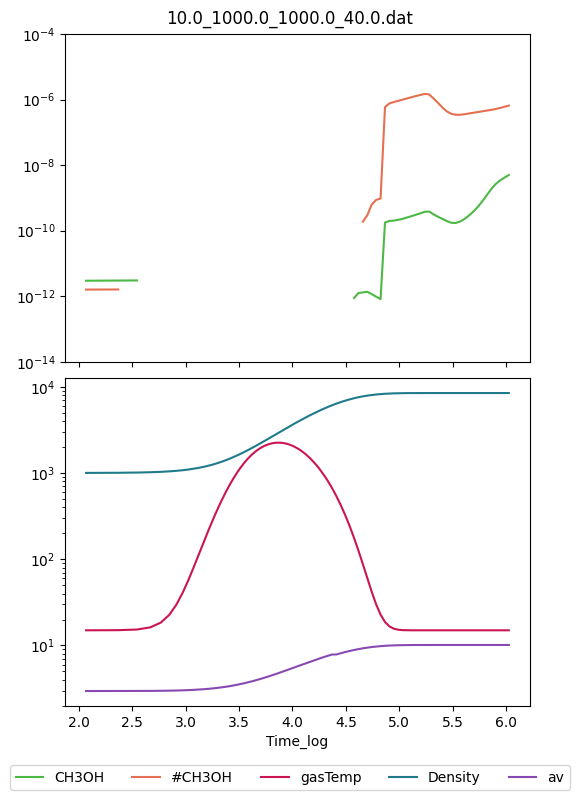

In [74]:
tipo=constants.SHOCK
df=df_sh

cols=['gasTemp', 'Density', 'av']
species=['CH3OH','#CH3OH']
colors=['#ca1551','#054a29','#4cb944','#e6b40f','#8c001a']

fig, axs = plt.subplots(2, 1, figsize=(6,8), sharex=True)
fig.subplots_adjust(top=0.95, hspace=0.05)

tdf=df[df['runName']==df['runName'][0]]

ax=axs[1]
for i,col in enumerate(cols):
    ax.plot(tdf['Time_log'], tdf[col], label=col, c=['#ca1551','#1f7a8c','#884ab2'][i])
    
fig.suptitle(df['runName'][0])
ax.set_yscale('log')
ax.set_xlabel('Time_log')

ax=axs[0]
for j,col in enumerate(species):
    ax.plot(tdf['Time_log'], tdf[col], label=col, c=['#4cb944','#e76f51'][j])
ax.set_yscale('log')
ax.set_ybound(1e-14,1e-4)

fig.legend(ncols=5, loc='lower center')

In [6]:
df=pl.localAbundanceDataframe(df_db, species, constants.physical, constants.BOTH, momento=constants.ALL, singleDf=False)

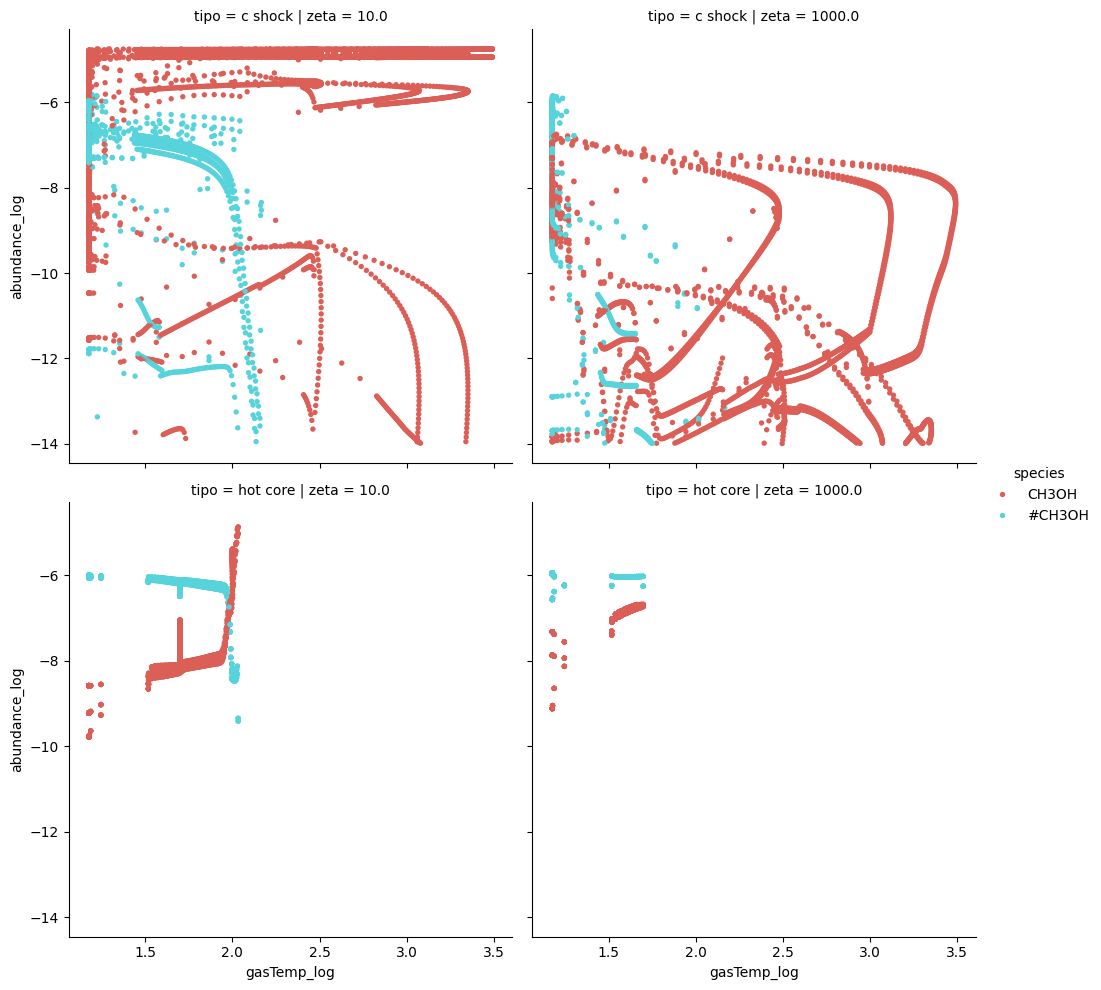

In [10]:
sns.relplot(data=df, x='gasTemp'+'_log', y='abundance'+'_log', hue='species',
            row='tipo', col='zeta', 
            palette='hls',
            legend='auto', kind='scatter', s=15, linewidth=0)